In [1]:
if "descended" not in locals():
    descended = 1
    %cd ".."
    
import os
from tqdm import tqdm
import utils
import numpy as np
import matplotlib.pyplot as plt
from dataloading import loading as dl

from simulations import dataset_creation as dc
from simulations import lightcurve_simulation as lcsim
from dataloading.loading import load_data
import visualize as vis
import pickle
from wotan import flatten

/Users/Yke/Desktop/AI/Thesis/ESA/transit-detection-rnn


In [15]:
time, flux, masks, params = lcsim.get_lightcurve(4)
time

array([0.00000000e+00, 1.38888889e-03, 2.77777778e-03, ...,
       2.73958333e+01, 2.73972222e+01, 2.73986111e+01])

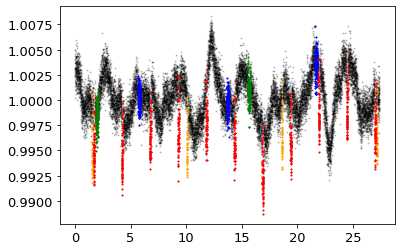

In [17]:
vis.plot(time[~masks[0]], flux[~masks[0]], a=0.2)
vis.plot(time[masks[0]], flux[masks[0]], c="orange")
vis.plot(time[masks[1]], flux[masks[1]], c="green")
vis.plot(time[masks[2]], flux[masks[2]], c="blue")
vis.plot(time[masks[3]], flux[masks[3]], c="red")

In [2]:
N_points = 1500  # number of data points within generated light curves (2min cadence)
generate_new = 0  # set to False if you want to skip generating new data

splitnames = ["train", "valid", "test"]
splitsizes = [15000, 5000, 5000]

np.random.seed(42)
if generate_new:
    for split, size in zip(splitnames, splitsizes):
          dc.generate_nn_dataset(split, size, N_points=N_points, rdepth_range=(0.25,10),
          snr_range=(3,80), period_range=(2,200), dur_range=(0,utils.hour2day(13)),
          pl_fracs=[0.5, 0.35, 0.15], base_dir="data/nn/sim")

In [3]:
N_points = 500  # number of data points within generated light curves (2min cadence)
generate_new = 0  # set to False if you want to skip generating new data

splitnames = ["train", "valid", "test"]
splitsizes = [15000, 5000, 5000]

np.random.seed(42)
if generate_new:
    for split, size in zip(splitnames, splitsizes):
          dc.generate_nn_dataset(split, size, N_points=N_points, rdepth_range=(0.25,10),
          snr_range=(3,80), period_range=(2,200), dur_range=(0,utils.hour2day(5.5)),
          pl_fracs=[0.5, 0.5], base_dir="data/nn/sim500")

In [40]:
N_points = 1500  # number of data points within generated light curves (2min cadence)
generate_new = 0  # set to False if you want to skip generating new data

splitnames = ["train", "valid"]
splitsizes = [9000, 3000]

np.random.seed(42)
if generate_new:
    for split, size in zip(splitnames, splitsizes):
          dc.generate_contrast_dataset(split, size, N_points=N_points, rdepth_range=(0.5,10),
          snr_range=(3,80), period_range=(2,200), dur_range=(utils.hour2day(1),utils.hour2day(13)), 
          base_dir="data/nn/contrast", lower_snr=False)

In [3]:
generate_new = 0

fname = "monotransit"
size = 5000

np.random.seed(42)
if generate_new:
    dc.generate_eval_dataset(fname, size, pl_fracs=[0.5,0.5], t_step=utils.min2day(2), snr_range=(3,80), 
                         rdepth_range=(.25,5), t_max=27.4, dur_range=(0,utils.hour2day(13)),
                         period_range=(2,100), base_dir="data/eval/sim", 
                         min_tr=1, max_tr=1, batch_save=250, lower_snr=False)

In [12]:
generate_new = 0

fname = "singleplanet"
size = 5000

np.random.seed(42)
if generate_new:
    dc.generate_eval_dataset(fname, size, pl_fracs=[0.5,0.5], t_step=utils.min2day(2), snr_range=(3,80), 
                         rdepth_range=(.25,5), t_max=27.4, dur_range=(0,utils.hour2day(13)),
                         period_range=(2,100), base_dir="data/eval/sim", 
                         min_tr=3, max_tr=50, batch_save=250, lower_snr=False)
    
    generate_new = 1

fname = "singleplanet"
size = 5000

np.random.seed(42)
if generate_new:
    dc.generate_eval_dataset(fname, size, pl_fracs=[0.5,0.5], t_step=utils.min2day(2), snr_range=(3,80), 
                         rdepth_range=(.25,5), t_max=27.4, dur_range=(0,utils.hour2day(13)),
                         period_range=(2,100), base_dir="data/eval/sim", 
                         min_tr=3, max_tr=50, batch_save=250, lower_snr=False)

In [31]:

pbar = tqdm(os.listdir("data/eval/sim/singleplanet"))
for fname in pbar:
    try:
        b = dl.load_data("data/eval/sim/singleplanet/" + fname)
        time = np.arange(len(b["flux"][0])) * utils.min2day(2)
        for i, flux in enumerate(b["flux"]):
            flat = flatten(time, flux, method="median", window_length=0.5)
            b["flux"][i] = flat
        with open("data/eval/sim/singleplanet_12h/"+fname, "wb") as f:
            pickle.dump(b, f)
    except:
        pbar.close()
        raise

100%|██████████| 20/20 [12:43<00:00, 38.18s/it]


In [22]:
os.listdir("data/eval/sim")

['.DS_Store', 'monotransit', 'singleplanet', 'singleplanet_12h']